1. Lakukan deteksi objek/shape pada sebuah citra menggunakan pendekatan Computer Vision. Silahkan menggunakan library yang tersedia pada pemrograman Python

In [58]:
# Import library
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np


In [59]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Read image from Google Drive
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/A.jpg')

In [61]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [62]:
 # Apply thresholding to segment the image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


In [63]:
# using a findContours() function
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

In [64]:
# list for storing names of shapes
for contour in contours:

	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(
		contour, 0.01 * cv2.arcLength(contour, True), True)
	
	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 255, 255), 5)

	# finding center point of shape
	M = cv2.moments(contour)
	if M['m00'] != 0.0:
		x = int(M['m10']/M['m00'])
		y = int(M['m01']/M['m00'])
	# putting shape name at center of each shape
    

	if len(approx) == 3:
		cv2.putText(img, 'Segi Tiga', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)

	elif len(approx) == 4:
		cv2.putText(img, 'Segi empat', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)
	else:
		cv2.putText(img, 'Lingkaran', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 255), 2)


In [65]:
# displaying the image after drawing contours
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


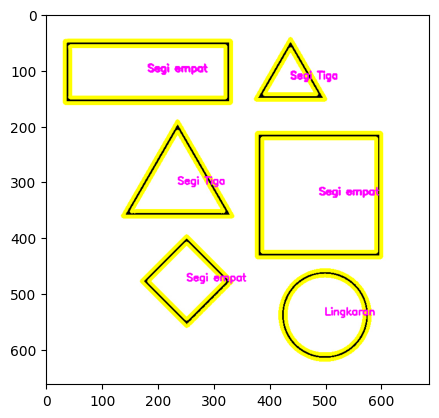

In [66]:
# Show the output image using Matplotlib
plt.imshow(img)
plt.show()

2. Setelah jenis objek/shape pada soal 1 diketahui, Lakukan perhitungan jarak dari sebuah 
shape pada sebuah citra menggunakan pendekatan Computer Vision. 

In [67]:
import cv2
import numpy as np
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
from google.colab.patches import cv2_imshow


In [68]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Load image from Google Drive
img_path = '/content/drive/MyDrive/Colab Notebooks/data/B.jpg'
img = cv2.imread(img_path)

In [70]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [71]:
# Threshold the image to obtain a binary image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [72]:
# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [73]:
pixels_per_cm = 0.026458333333333

In [74]:
def midpoint(ptA, ptB):
    	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [75]:
for cnt in contours:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box

	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))

	wid_pixels = euclidean(tl, tr)

	cv2.putText(img, "{:.1f}cm".format(wid_pixels*pixels_per_cm), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)
	cv2.putText(img, "{:.1f}pixels".format(wid_pixels), (int(mid_pt_horizontal[0] - 30), int(mid_pt_horizontal[1] + 20)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

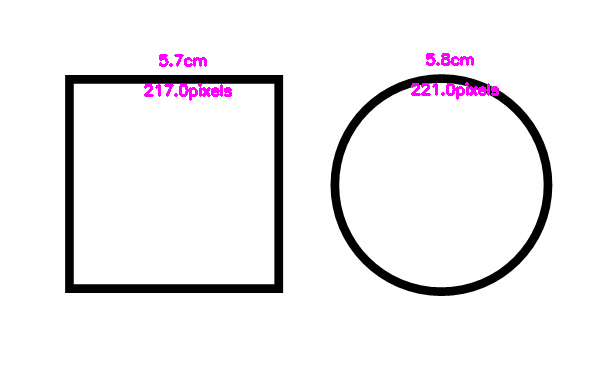

In [76]:
cv2_imshow(img)